<center><img src="https://i.imgur.com/YNtjmbq.png" width="800"></center> 

<div class="alert alert-info" role="alert">
    
## Data para la sesión

Para esta sesión, los datos puedes descargarlos en _tu_ carpeta **data** desde este [enlace](https://drive.google.com/drive/folders/1I48Vani9iBX-AdEbXH-qCsbinH2t8oEj?usp=sharing).
</div>



# Práctica 4 – Visualización de Propiedades de la red

[VosViewer](https://www.vosviewer.com/) es un servicio de analisis de datos bibliográficos, la data que usaremos ha sido preparado por ellos. De la carpeta de datos para la sesión, usemos el de tipo **graphml**:

In [1]:
import networkx as nx

journal=nx.read_graphml("data/journal.graphml")

Esta es una red que representa citadas entre journals. No es la red total, lo que se tiene es:

In [2]:
len(journal.edges), len(journal.nodes)

(4112, 232)

Esta red viene con atributos en los nodos y enlaces:

In [3]:
# en los nodos
[x.keys() for x in journal.nodes.values()][0]

dict_keys(['label', 'description', 'cluster', 'x', 'y', 'issn', 'citations'])

In [4]:
# en los enlaces
[x.keys() for x in journal.edges.values()][0]

dict_keys(['weight', 'id'])

Esta es una red que indica el patron de citación entre revistas. Por lo que es de tipo dirigido:

In [5]:
nx.is_directed(journal)

True

Verifiquemos algunas particularidades:
1. ¿Tendremos algun journal  que no siga a otro ni sea seguido por otro?

In [6]:
list(nx.isolates(journal))

[]

2. ¿Cuál es su nivel de reciprocidad?

In [7]:
nx.overall_reciprocity(journal)

0.0

Esto indica que ningun nodo recibe un link de otro. Aqui el detalle:

In [8]:

import pandas as pd
pd.DataFrame.from_dict(nx.reciprocity(journal,nodes=journal.nodes),orient='index').value_counts()

0  
0.0    232
Name: count, dtype: int64

3. ¿Cada nodo puede conectarse con otro nodo? De lo anterior ya sabemos que no, por lo que no es **strongly connected**:

In [9]:
nx.is_strongly_connected(journal)

False

Asi, hay tantos componentes conectados como nodos.

In [10]:
nx.number_strongly_connected_components(journal)

232

4. ¿Que tant cerca a una rede completamente conectada está nuestra red?

In [11]:
nx.density(journal)

0.0767278698313181

La **densidad** es muy baja, lo cuál corrobora lo hayado.

# Gráficas

## Hairballs

El hairball es simplemente una red con los nodos ubicados al azar.

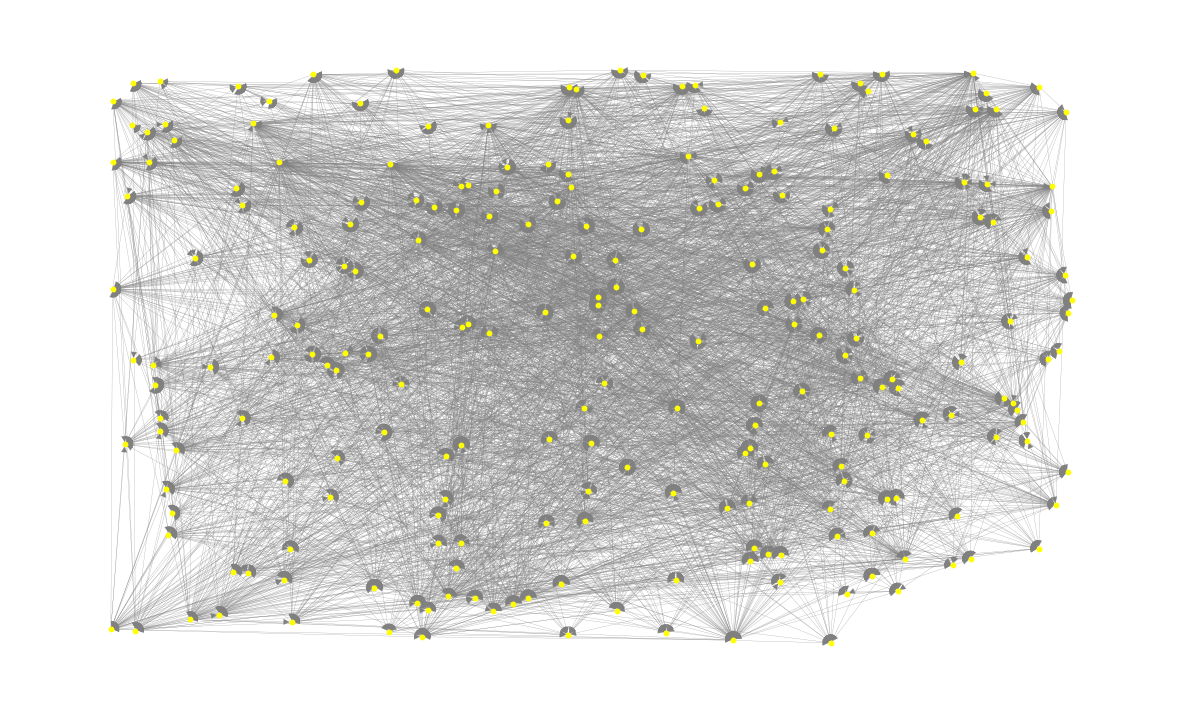

In [12]:
import matplotlib.pyplot as plt

nodePositions_random=nx.random_layout(journal)

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15,'edge_color':'grey','node_color':'yellow'}
nx.draw_networkx(journal, pos=nodePositions_random, ax=ax, **plot_options)

## Force-Directed

Esta familia de layouts ayuda graficar los nodos mezclando atracción y repulsion.

[1.0,
 1.0,
 1.0,
 41.0,
 3.0,
 77.0,
 1.0,
 1.0,
 6.0,
 2.0,
 1.0,
 1.0,
 29.0,
 1.0,
 30.0,
 14.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 12.0,
 7.0,
 8.0,
 5.0,
 2.0,
 1.0,
 13.0,
 1.0,
 3.0,
 1.0,
 8.0,
 16.0,
 6.0,
 6.0,
 2.0,
 17.0,
 16.0,
 1.0,
 6.0,
 10.0,
 15.0,
 2.0,
 1.0,
 11.0,
 14.0,
 2.0,
 1.0,
 2.0,
 9.0,
 2.0,
 1.0,
 3.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 5.0,
 1.0,
 3.0,
 10.0,
 3.0,
 4.0,
 2.0,
 1.0,
 4.0,
 9.0,
 1.0,
 1.0,
 2.0,
 1.0,
 3.0,
 5.0,
 1.0,
 6.0,
 1.0,
 25.0,
 1.0,
 12.0,
 14.0,
 35.0,
 2.0,
 3.0,
 29.0,
 1.0,
 3.0,
 17.0,
 4.0,
 35.0,
 3.0,
 2.0,
 3.0,
 17.0,
 23.0,
 16.0,
 4.0,
 24.0,
 9.0,
 6.0,
 1.0,
 2.0,
 13.0,
 1.0,
 8.0,
 5.0,
 2.0,
 7.0,
 5.0,
 8.0,
 7.0,
 4.0,
 24.0,
 2.0,
 1.0,
 10.0,
 2.0,
 1.0,
 1.0,
 2.0,
 10.0,
 2.0,
 1.0,
 12.0,
 4.0,
 4.0,
 17.0,
 5.0,
 3.0,
 1.0,
 1.0,
 2.0,
 8.0,
 6.0,
 3.0,
 1.0,
 6.0,
 2.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 10.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 4.0,
 4.0,
 1.0,
 4.0,
 2.0,
 1.0,
 5.0,
 

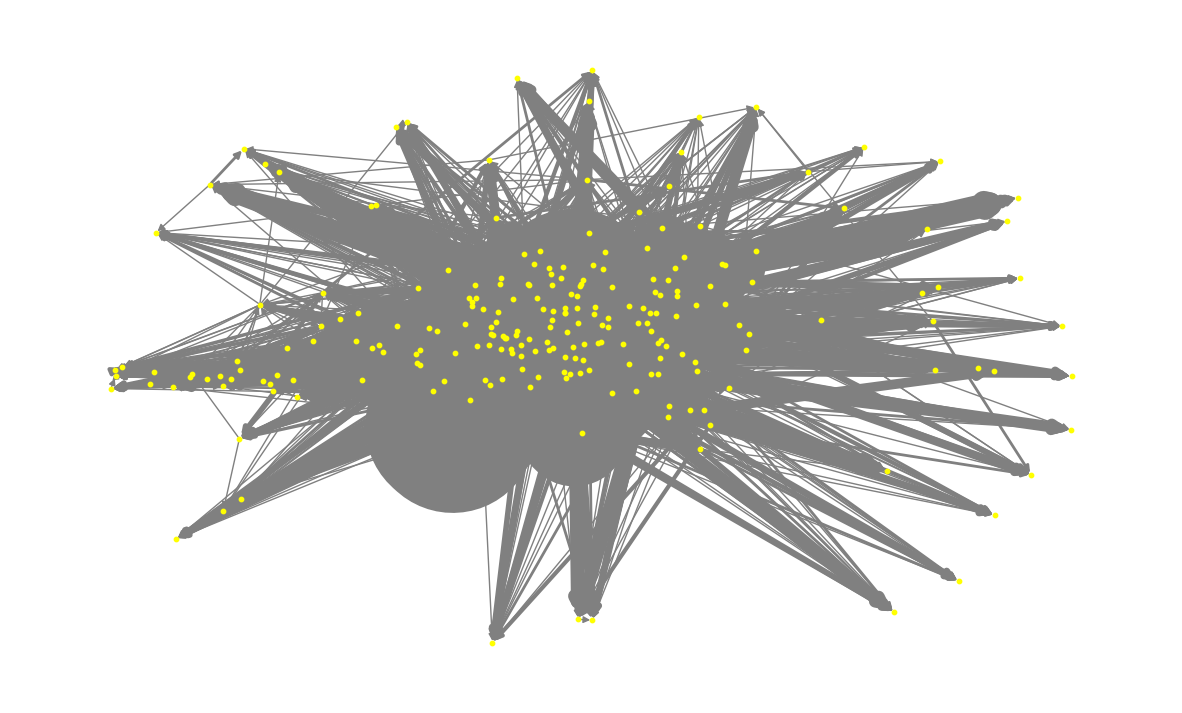

In [31]:
nodePositions_spring = nx.spring_layout(journal)
weights = list(nx.get_edge_attributes(journal,'weight').values())

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False,'edge_color':'grey','node_color':'yellow','width':weights}
nx.draw(journal, pos=nodePositions_spring, ax=ax, **plot_options)

## Custom

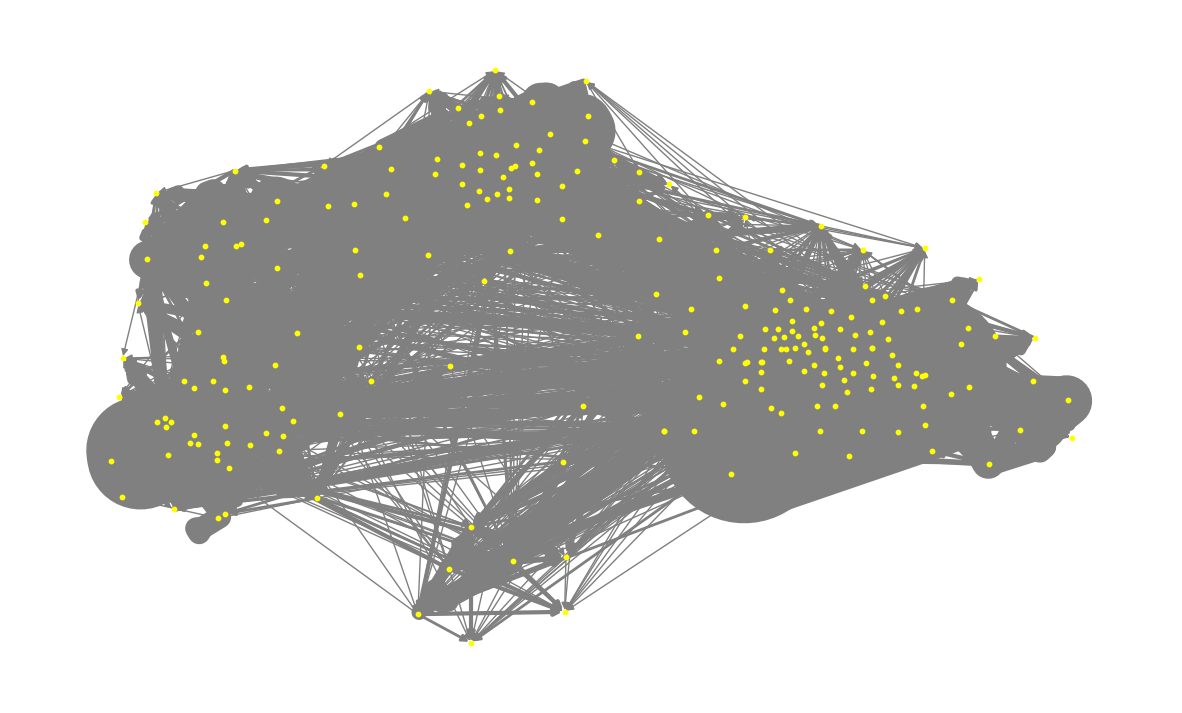

In [34]:
nodePositions_vox={k:(x,y) for k,x,y in zip(list(journal.nodes),
                                            nx.get_node_attributes(journal, 'x').values(),
                                            nx.get_node_attributes(journal, 'y').values())}


fig, ax = plt.subplots(figsize=(15, 9))
plot_options = {"node_size": 10, "with_labels": False,'edge_color':'grey','node_color':'yellow','width':weights}
ax.axis("off")
nx.draw_networkx(journal, pos=nodePositions_vox, ax=ax, **plot_options)

## Propiedades a visualizar

### <div class="alert alert-success" role="alert">Grado (degree)</div>

De esa red podemos saber:
1. ¿Quíen tiene más vecinos?
   
    a. conectados a él: 

In [274]:
(sorted(journal.in_degree, key=lambda item: item[1], reverse=True))[0]

('115', 38)

    b. con los que él se conecta:

In [275]:
(sorted(journal.out_degree, key=lambda item: item[1], reverse=True))[0]

('2', 114)

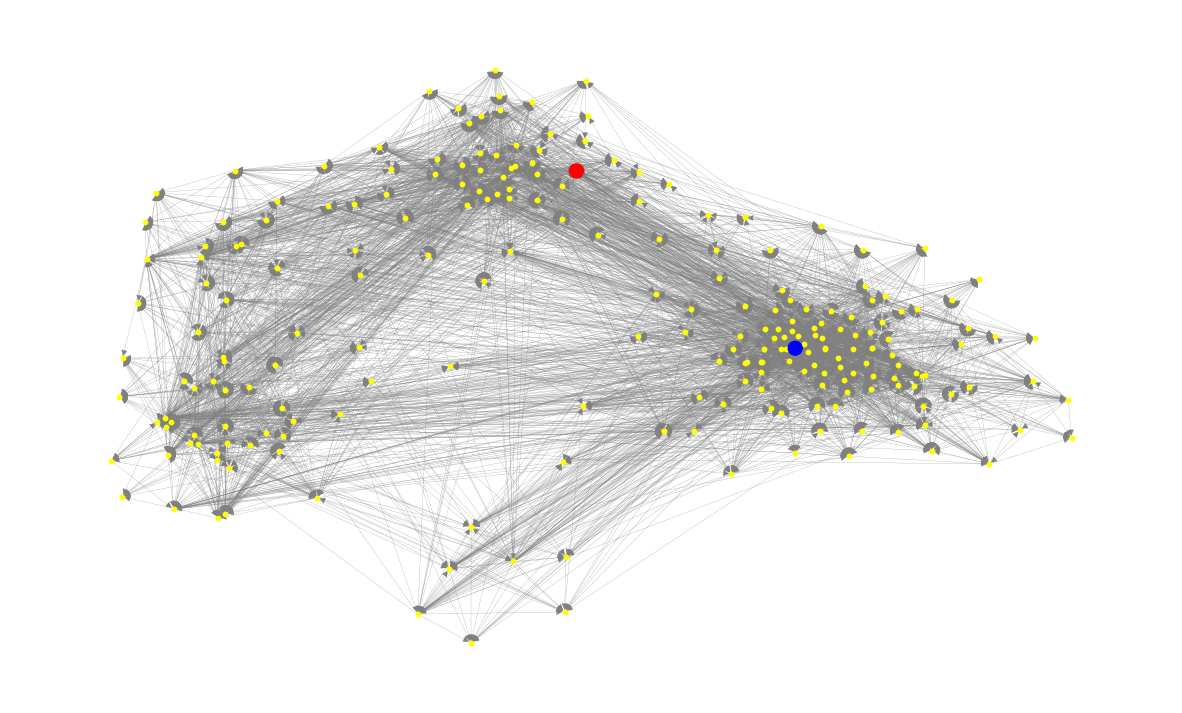

In [292]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15,'edge_color':'grey','node_color':'yellow'}

nx.draw_networkx(journal, pos=nodePositions_vox, ax=ax, **plot_options)
nx.draw_networkx_nodes(journal,nodePositions_vox,nodelist=['115','2'],ax=ax,node_color=['r','b'], node_size=100)

Guardemos todos los valores anteriores:

In [293]:
import pandas as pd

indegree=pd.Series(dict(journal.in_degree()),name='indegree')
outdegree=pd.Series(dict(journal.out_degree()),name='outdegree')

# nx.set_node_attributes(journal, {k:v for k,v in zip(list(journal),indegree)}, name='indegree')
# nx.set_node_attributes(journal, {k:v for k,v in zip(list(journal),outdegree)}, name='outdegree')

In [299]:
journal.nodes(data=True)['1']

{'label': 'eur j oper res',
 'description': 'EUROPEAN JOURNAL OF OPERATIONAL RESEARCH',
 'cluster': 3,
 'x': -526.2414,
 'y': 362.03247,
 'issn': '0377-2217',
 'citations': 892,
 'indegree': 0,
 'outdegree': 78}

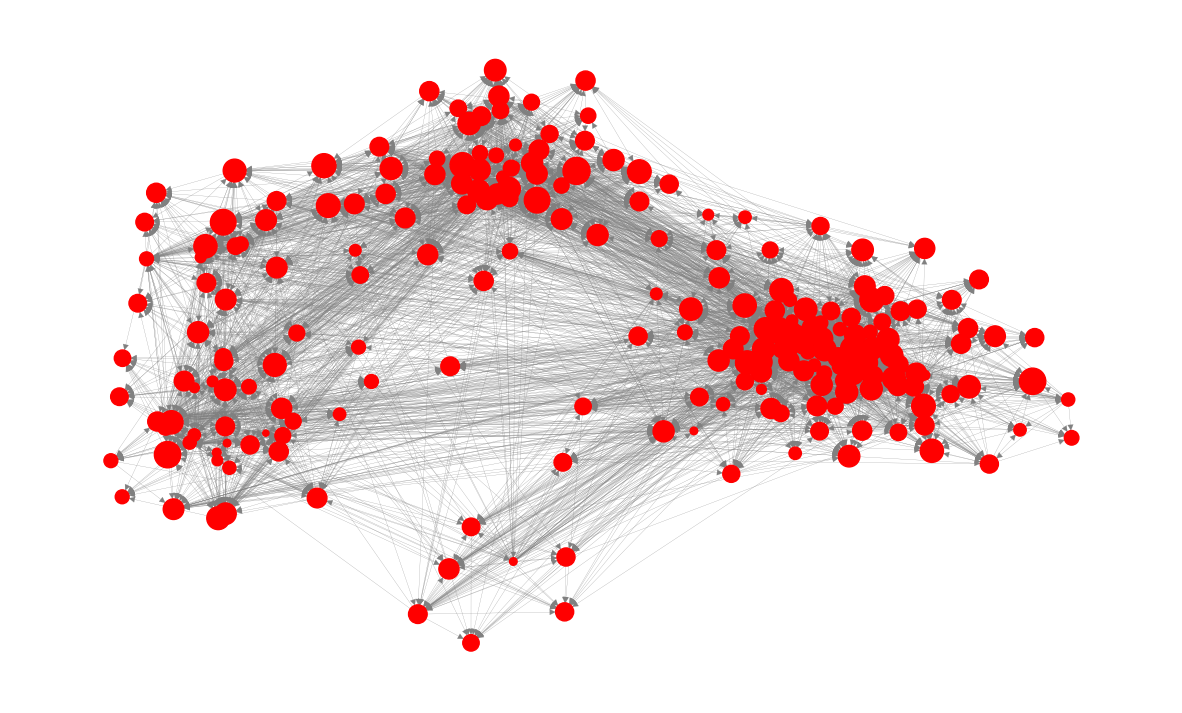

In [307]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10*indegree.values, "with_labels": False, "width": 0.15,'edge_color':'grey','node_color':'red'}

nx.draw_networkx(journal, pos=nodePositions_vox, ax=ax, **plot_options)

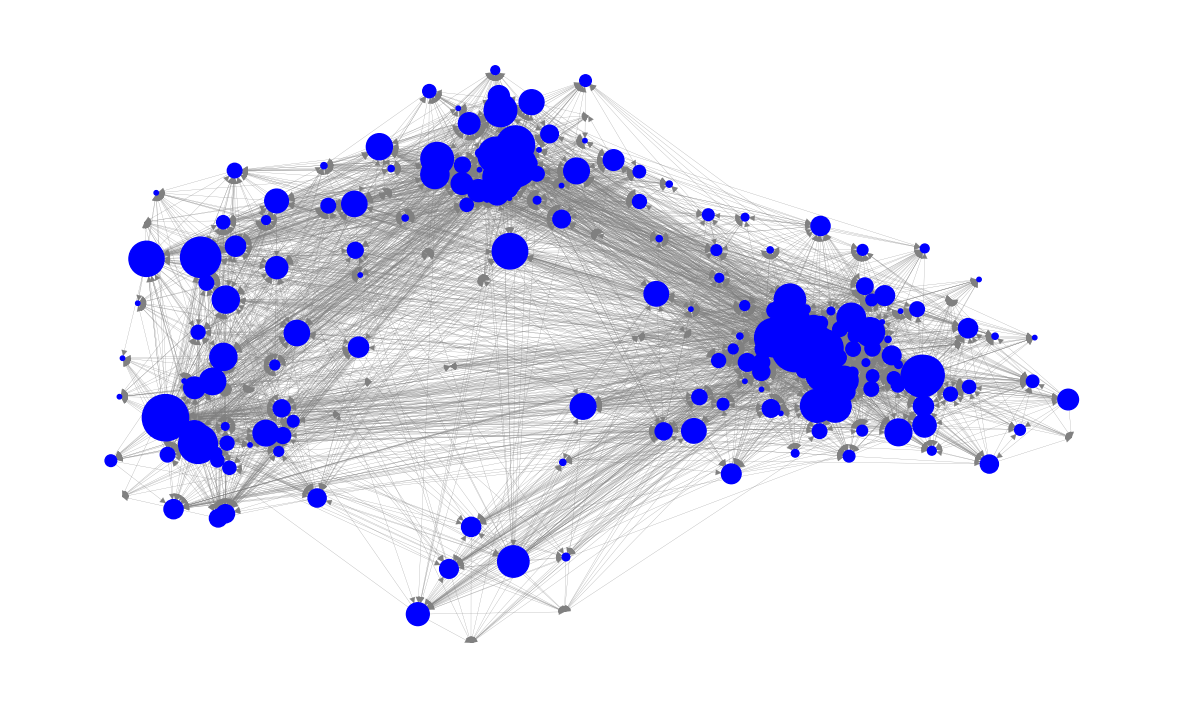

In [308]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10*outdegree.values, "with_labels": False, "width": 0.15,'edge_color':'grey','node_color':'blue'}

nx.draw_networkx(journal, pos=nodePositions_vox, ax=ax, **plot_options)

### El degree 0

In [343]:
zeroDegree=pd.Series(2*(medidasJournal.outdegree==0) + 1*(medidasJournal.indegree==0),name='zerodegree')

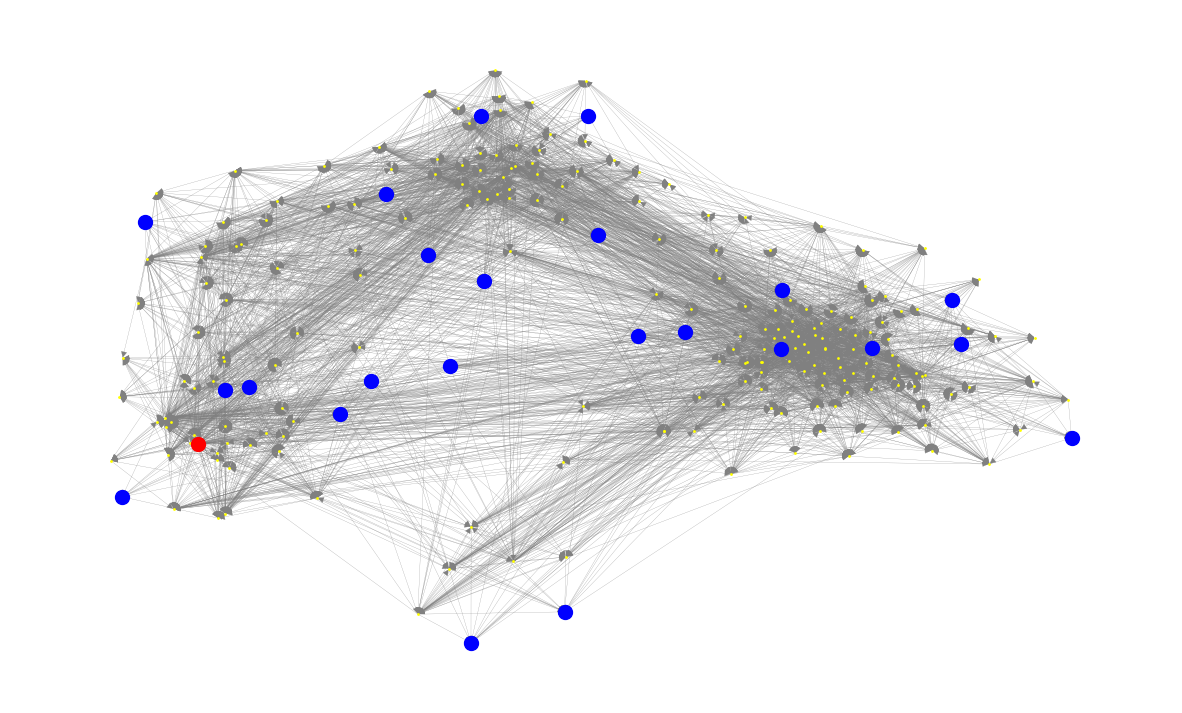

In [342]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 1, "with_labels": False, "width": 0.15,'edge_color':'grey','node_color':'yellow'}

nx.draw_networkx(journal, pos=nodePositions_vox, ax=ax, **plot_options)
nx.draw_networkx_nodes(journal,nodePositions_vox,nodelist=zeroDegree[zeroDegree==1].index,ax=ax,node_color=['r'], node_size=100)
nx.draw_networkx_nodes(journal,nodePositions_vox,nodelist=zeroDegree[zeroDegree==2].index,ax=ax,node_color=['b'], node_size=100)

### <div class="alert alert-success" role="alert">LINK-BASED</div>

In [309]:
h_dict,a_dict=nx.hits(journal)
pagerank_dict=nx.pagerank(journal)

HITS_hubs=pd.Series(h_dict,name='HITS_hubs')
HITS_authorities=pd.Series(a_dict,name="HITS_authorities")
Pagerank=pd.Series(pagerank_dict,name='Pagerank')

pd.concat([HITS_hubs,HITS_authorities,Pagerank],axis=1)

HITS_hubs  HITS_authorities  Pagerank
1     0.033161         -0.000000  0.001480
2     0.083688          0.000103  0.001483
3     0.182790          0.006601  0.001535
4     0.064329          0.002634  0.001495
5     0.030963          0.012210  0.001650
..         ...               ...       ...
228   0.000013          0.000891  0.017221
229   0.000013          0.000674  0.012053
230  -0.000000          0.001219  0.005440
231   0.000019          0.000502  0.028470
232  -0.000000          0.000506  0.052718

[232 rows x 3 columns]

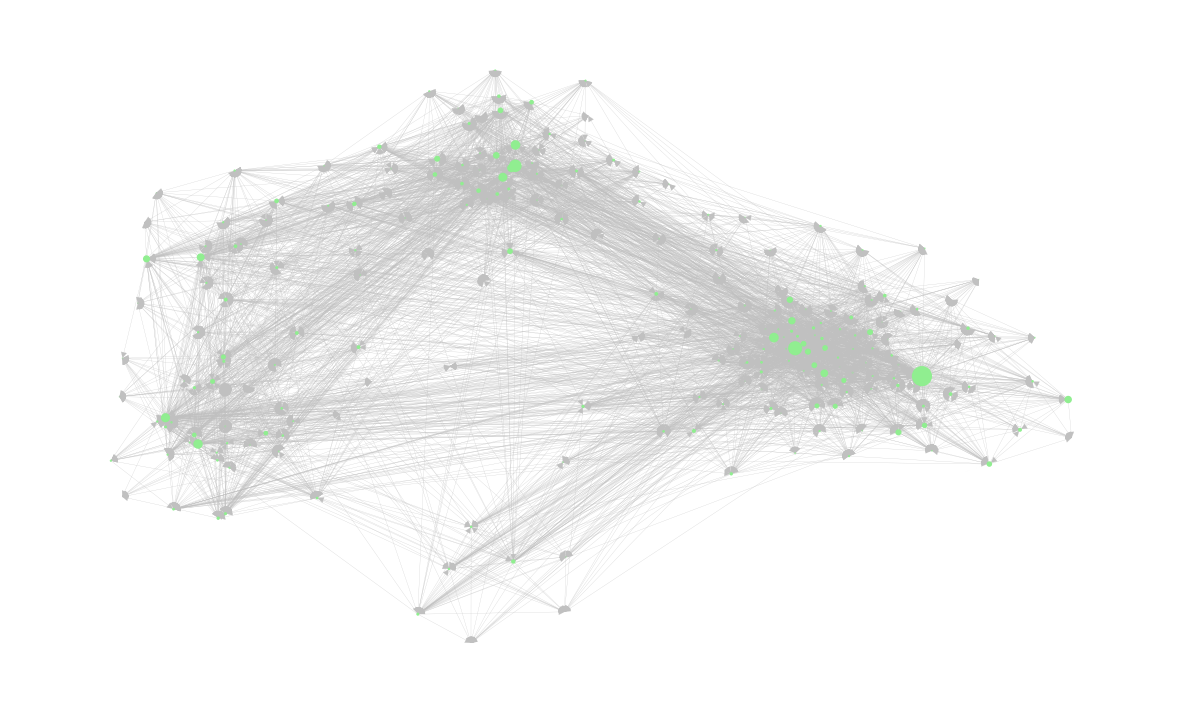

In [312]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 1000*HITS_hubs.values, "with_labels": False, "width": 0.15,'edge_color':'silver','node_color':'lightgreen'}

nx.draw_networkx(journal, pos=nodePositions_vox, ax=ax, **plot_options)

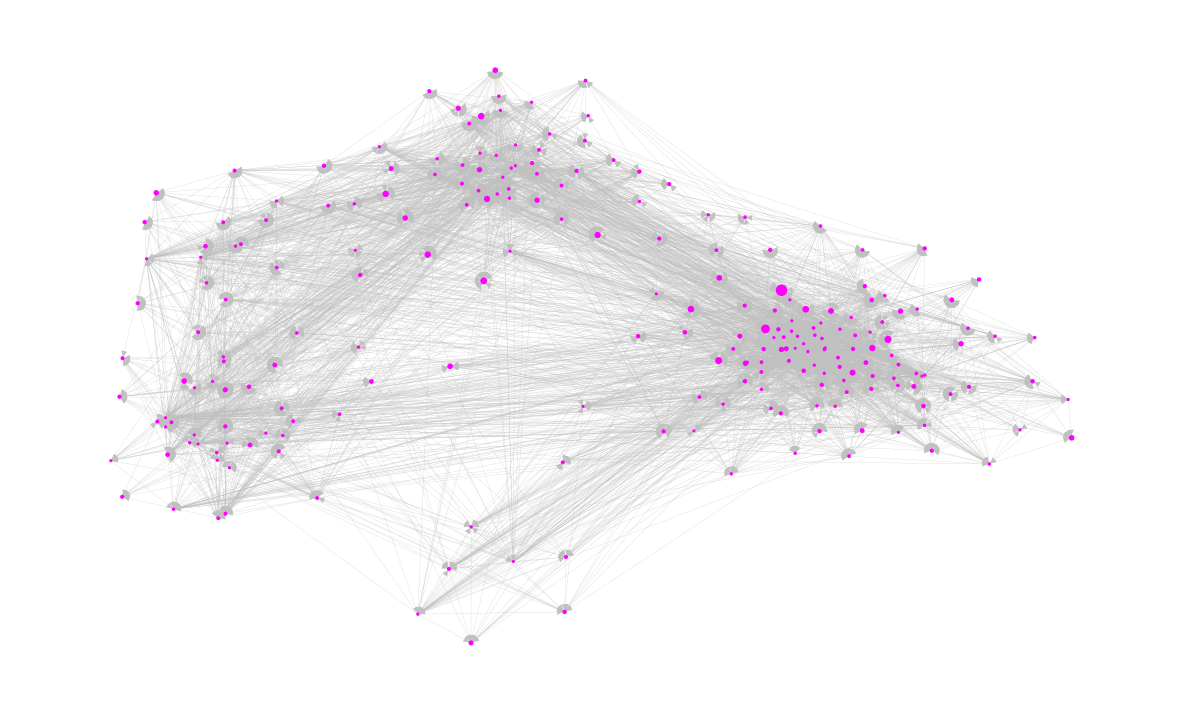

In [313]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 1000*Pagerank.values, "with_labels": False, "width": 0.15,'edge_color':'silver','node_color':'magenta'}

nx.draw_networkx(journal, pos=nodePositions_vox, ax=ax, **plot_options)

### <div class="alert alert-success" role="alert">CENTRALIDAD</div>

In [316]:
closeness_centrality_in_dict=nx.closeness_centrality(journal,distance=None)
closeness_centrality_out_dict=nx.closeness_centrality(journal.reverse(),distance=None)
betweenness_centrality_dict=nx.betweenness_centrality(journal)

closeness_centrality_in= pd.Series(closeness_centrality_in_dict,name='INcloseness')
closeness_centrality_out= pd.Series(closeness_centrality_out_dict,name='OUTcloseness')
betweenness_centrality= pd.Series(betweenness_centrality_dict,name='betweenness')

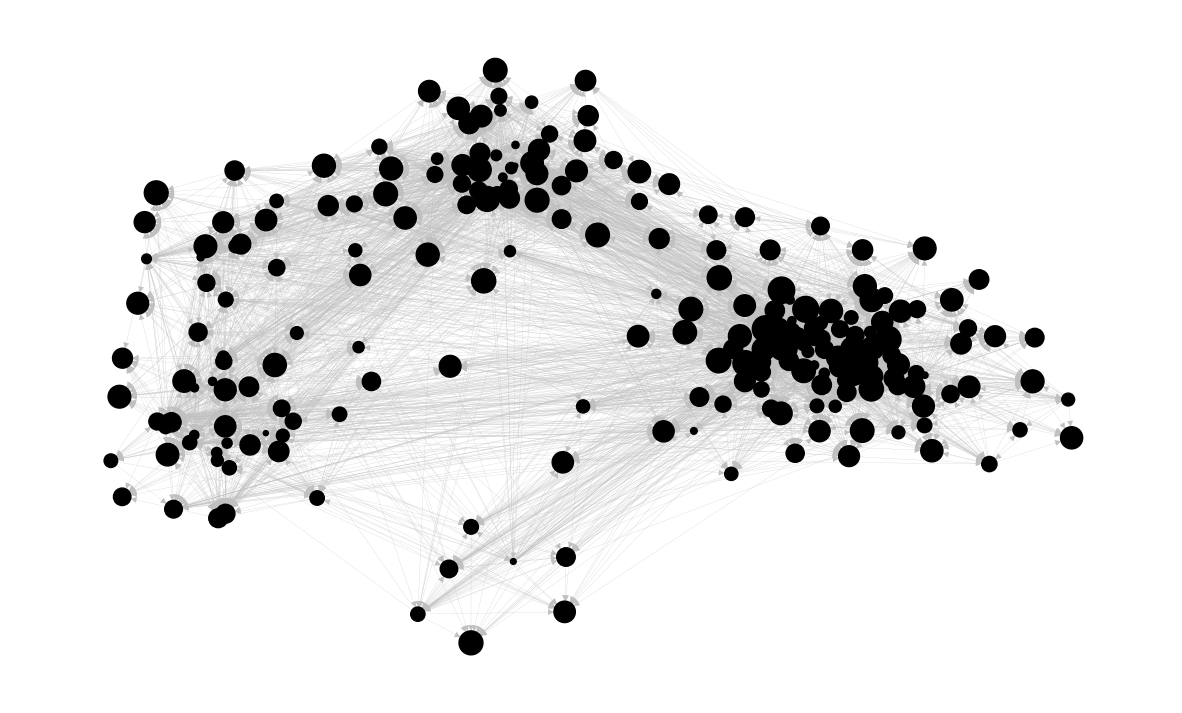

In [318]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 1000*closeness_centrality_in.values, "with_labels": False, "width": 0.15,'edge_color':'silver','node_color':'k'}

nx.draw_networkx(journal, pos=nodePositions_vox, ax=ax, **plot_options)

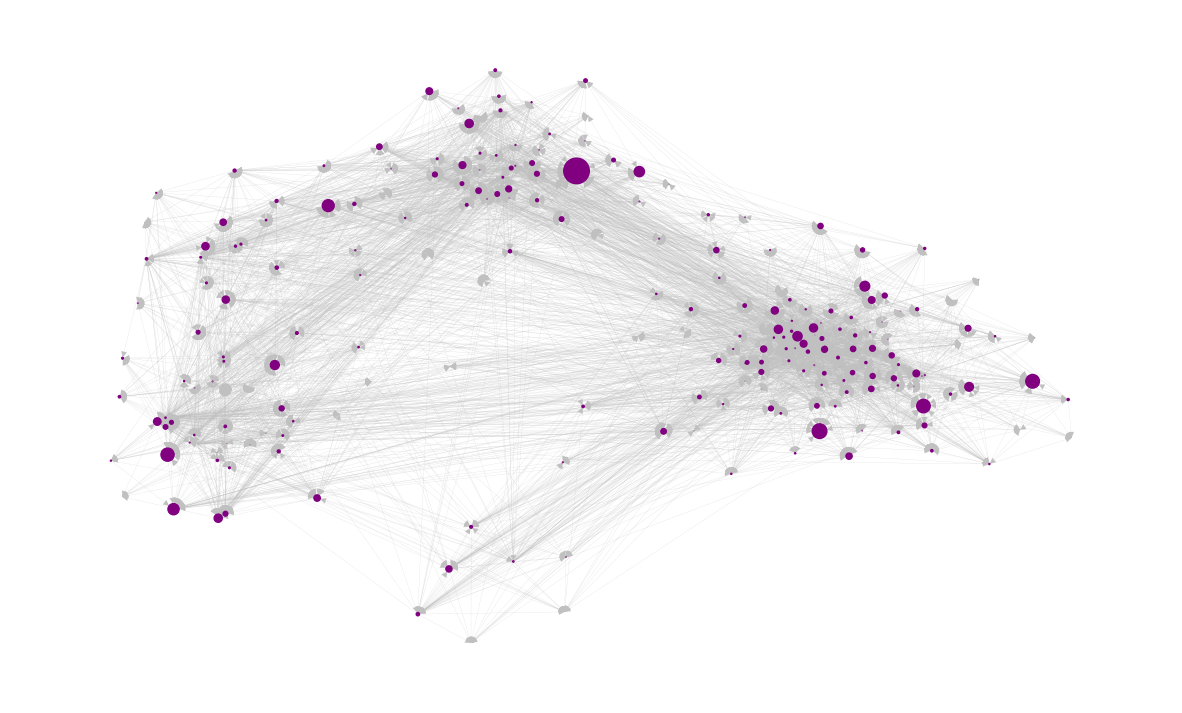

In [328]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": (1000*betweenness_centrality.values)**2, "with_labels": False, "width": 0.1,'edge_color':'silver','node_color':'purple'}

nx.draw_networkx(journal, pos=nodePositions_vox, ax=ax, **plot_options)

In [44]:
node_cut=nx.minimum_node_cut(journal)
edge_cut=nx.minimum_edge_cut(journal)
len(node_cut),len(edge_cut)

(0, 0)

# Usemos Gephi

1. Abramos el mismo archivo en Gephi.
2. Pidamos los estadísticos:  
* Average Degree
* Network Diamater
* HIT
* PageRank

3. Selecciones "Appearance". Desde ahí, asignemos diferentes tamaños a los nodos basados en los valores calculados.

<div class="alert-success">

## Ejercicio

Abra en Gephi el archivo SeattleTop, calcule los estadístico vistoes en esta sesión, y úselos para graficar.